In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US= df_DA_US.explode('job_skills')

df_DA_US[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [21]:
df_DA_US_grouped= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay=df_DA_US_grouped.sort_values(by='median',ascending=False).head(10)

df_DA_skills= df_DA_US_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median')


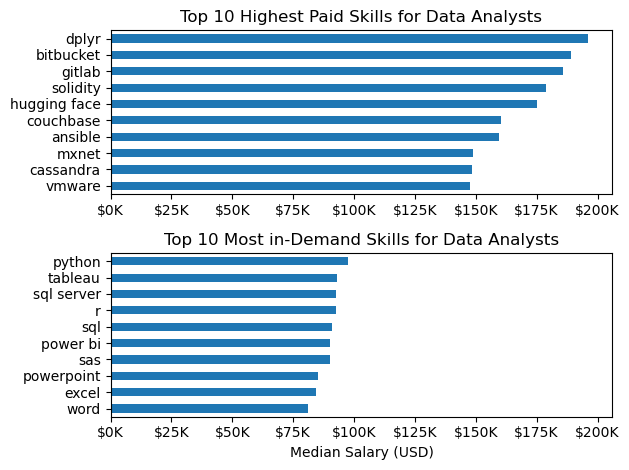

In [39]:
fig,ax=plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()